## 사용자 행동 인식 데이터셋

- 손목 스마트폰 센서를 통해 수집된 일상의 동작 데이터를 통해 6가지 Activity로 예측

- [캐글](https://www.kaggle.com)의 [Human Activity Recognition with Smartphones](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 `human_activity_train.csv`와 `human_activity_train.csv`로 datasets 디렉토리에 저장

### 1. 데이터 탐색

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('datasets/human_activity_train.csv')
test = pd.read_csv('datasets/human_activity_test.csv')

In [3]:
train.shape, test.shape

((7352, 563), (2947, 563))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [6]:
train.isnull().sum().sum()

0

In [7]:
test.isnull().sum().sum()

0

In [8]:
test['Activity'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [9]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

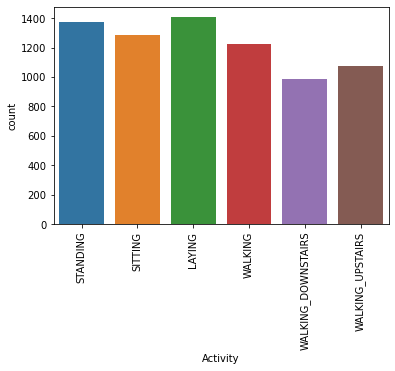

In [10]:
sns.countplot(x=train['Activity'])
plt.xticks(rotation=90)

In [11]:
train['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [12]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


* train, test의 Activity 데이터 OrdinalEncoder(object -> float)

In [13]:
from sklearn.preprocessing import OrdinalEncoder # 특성 변환 시 사용
from sklearn.preprocessing import LabelEncoder   # 타겟 특성 변환 시 사용

In [14]:
label_encoder = LabelEncoder()

train['Activity'] = label_encoder.fit_transform(train['Activity'])

In [15]:
train['Activity'].value_counts()

0    1407
2    1374
1    1286
3    1226
5    1073
4     986
Name: Activity, dtype: int64

In [16]:
label_encoder = LabelEncoder()

test['Activity'] = label_encoder.fit_transform(test['Activity'])

In [17]:
test['Activity'].value_counts()

0    537
2    532
3    496
1    491
5    471
4    420
Name: Activity, dtype: int64

* X_train, X_test, y_train, y_test 구하기

In [18]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train['Activity']

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test['Activity']

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

* 모델 훈련

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

### LogisticRegression

* X_train_scaled로 학습

In [82]:
std_scaler = StandardScaler()

In [83]:
X_train_scaled = std_scaler.fit_transform(X_train)

In [84]:
lr_clf = LogisticRegression(random_state=42)
y_scores_lr = cross_val_score(lr_clf, X_train_scaled, y_train, scoring='accuracy', cv=5, n_jobs=-1)
y_scores_lf.mean()

0.933495007792376

In [86]:
soft_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
y_scores_soft = cross_val_score(soft_clf, X_train_scaled, y_train, scoring='accuracy', cv=5, n_jobs=-1)
y_scores_soft.mean()

0.9332224364932922

* X_train로 학습

In [68]:
lr_clf = LogisticRegression(solver='liblinear', random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test, lr_pred)

0.9619952494061758

In [77]:
lr_clf = LogisticRegression(random_state=42)
y_scores_lr = cross_val_score(lr_clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

In [78]:
y_scores_lr.mean()

0.933495007792376

In [74]:
soft_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

In [79]:
y_scores_soft = cross_val_score(soft_clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

In [80]:
y_scores_soft.mean()

0.933495007792376

* GridSearch

In [69]:
param_grid = {
    'C' : [10, 20]
}

In [70]:
grid_search = GridSearchCV(lr_clf, param_grid, 
                           scoring='accuracy', cv=3, 
                           return_train_score=True, n_jobs=-1)

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [10, 20]}, return_train_score=True,
             scoring='accuracy')

In [72]:
grid_search.best_params_

{'C': 20}

In [73]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9616559212758737

### DecisionTreeClassifier

* max_depth, max_features, min_samples_split, 시각화

In [49]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
accuracy_score(y_test,tree_pred)

0.8622327790973872

In [87]:
tree_clf = DecisionTreeClassifier(random_state=42)
y_scores_tree = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)

In [88]:
y_scores_tree

array([0.80897349, 0.81985044, 0.84829932, 0.87823129, 0.88163265])

In [105]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'max_features' : ["sqrt", None]
}

In [106]:
grid_search = GridSearchCV(tree_clf, param_grid, 
                           scoring='accuracy', cv=5, 
                           return_train_score=True, n_jobs=-1)

In [107]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', None]},
             return_train_score=True, scoring='accuracy')

In [108]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'sqrt'}

In [109]:
grid_search.best_score_

0.8641272307699422

In [ ]:
grid_search.best_estimator_

In [114]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(grid_search.best_estimator_,
                out_file = "tree_clf.dot",
               feature_names=X_train.columns,
               rounded=True,
               filled=True)

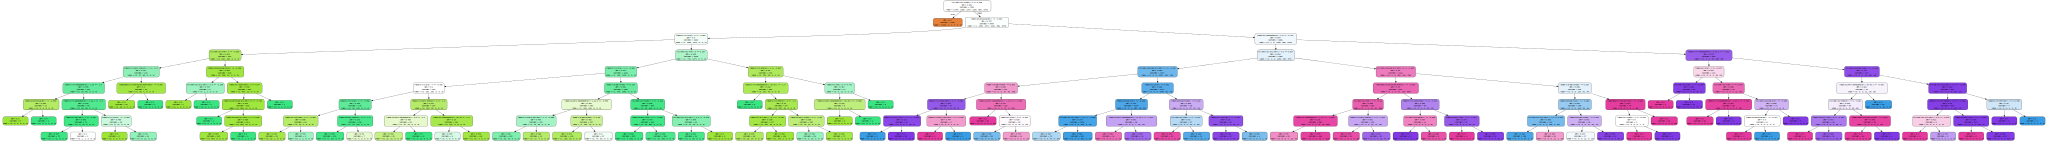

In [115]:
with open("tree_clf.dot", encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [116]:
grid_search.best_estimator_.feature_importances_

array([0.00000000e+00, 1.83833957e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.75914737e-04, 1.17104691e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.69066515e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.18986409e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.51353547e-01, 7.90098907e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.01451192e-03, 3.40592248e-02, 4.33797138e-02, 0.00000000e+00,
      

### RandomForestClassifier

* n_estimators, max_features, max_depth, 특성 중요도

In [118]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_scores_tree = cross_val_score(forest_clf, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)

In [119]:
y_scores_tree

array([0.90890551, 0.90210741, 0.9047619 , 0.9244898 , 0.94557823])

In [120]:
param_grid = [
    {'max_depth' : [2, 4, 6, 8, 10], 'max_features' : ['sqrt', None]}
]

In [121]:
grid_search = GridSearchCV(forest_clf, param_grid, 
                           scoring='accuracy', cv=5, 
                           return_train_score=True, n_jobs=-1)

In [122]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [2, 4, 6, 8, 10],
                          'max_features': ['sqrt', None]}],
             return_train_score=True, scoring='accuracy')

In [123]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'sqrt'}

In [124]:
grid_search.best_score_

0.9241064202703516

In [44]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.9260264675941635

In [50]:
param_grid = [
    {'n_estimators' : [10, 30, 50, 100], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

In [51]:
grid_search = GridSearchCV(rf_clf, param_grid, 
                           scoring='accuracy', cv=3, 
                           return_train_score=True, n_jobs=-1)

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 30, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [54]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

In [55]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9368849677638276

In [56]:
grid_search.best_estimator_.feature_importances_

array([0.00046857, 0.00052375, 0.00053331, 0.01088001, 0.00064763,
       0.00046053, 0.00664207, 0.00079515, 0.0005742 , 0.00747466,
       0.00037295, 0.00038618, 0.00075435, 0.00035464, 0.00060111,
       0.00055056, 0.00760297, 0.00076982, 0.00050965, 0.00122773,
       0.0010931 , 0.00050613, 0.00181997, 0.00058484, 0.00049288,
       0.00040513, 0.00039108, 0.00063979, 0.00039659, 0.00062396,
       0.00018734, 0.00032582, 0.00027792, 0.00039035, 0.0002387 ,
       0.00027742, 0.00044341, 0.00420289, 0.00136623, 0.00252402,
       0.03097171, 0.02067874, 0.0077411 , 0.00302508, 0.00164237,
       0.00073894, 0.00245058, 0.00127095, 0.00025836, 0.01598285,
       0.01960454, 0.01123357, 0.01840957, 0.01739154, 0.00463429,
       0.00526039, 0.01073887, 0.01173316, 0.00836667, 0.00066107,
       0.00132208, 0.00033676, 0.00287156, 0.00323811, 0.00048174,
       0.0049432 , 0.0049525 , 0.00498093, 0.00120633, 0.00744716,
       0.00411109, 0.00135362, 0.00183456, 0.00570434, 0.00473